# Machine Learning, Excercise 3

* Attila Lazar 0026842
* Bogdan

In [4]:
import os
os.getcwd()
import matplotlib.pyplot as plt
os.chdir('/home/lazafi/labor/ml-2019/male2019/3/src/fruits')
os.getcwd()

import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from PIL import Image
from glob import glob
import csv
import seaborn as sn
import pandas as pd

#from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from helper import *



## Feature Variables

### Pixel Data

Images are read as 3-tupples of color values. We use cv2 library for reading images and to convert them in rgb arrays.  Color values are then standartized.

In [5]:
# read is limited to 2 files from 2 subdirecories
fruit2data = FIDS30DataSet("/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", limit=2)
# TODO: why hangs
#fruit2data.addFeatures(Pixel())
#print(fruit2data.x_data)

 category strawberries 2
 category apples 2


### Histogram

From the pixel data we extracted color histograms. For the color images we count the occurances for each 256 colors in each of the 3 channels seperatelly and concat them to a long histogram of 768 colors. We also provide the option to reduce the histogram to the given amount of bins.


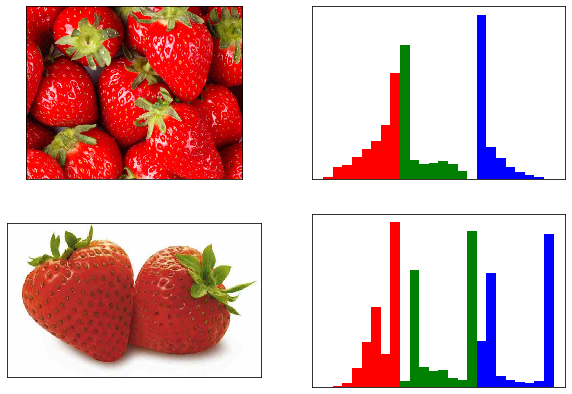

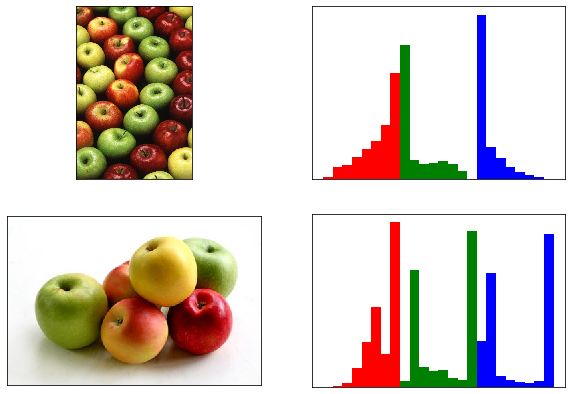

In [6]:
# we only use 10 bins per color channel
fruit2data.resetFeatures()
fruit2data.addFeatures(Histogram(8, debug=True))


### Visual Bag of Words

We use BOV to describe features of images. 

TODO: explain method used
TODO: show something


In [7]:
fruit2data.resetFeatures()
#fruit2data.addFeatures(BOV(10, debug = True))
fruit2data.addFeatures(BOV(10, debug = False))

Computing Features for strawberries
Computing Features for apples
Vocabulary Histogram Generated


## Classifiers

We used following classifiers from the sklearn library:

* svm
* knn
* mlp

## Evaluation

For each experiment we computed the *confusion matrix* the visually inspect the accuracy of the classification. Additionaly we also use macro-averaged precission to compare between classifiers.

## FIDS30 Fruits Dataset

We used the FIDS30 dataset provided by the lecture. It consists of 30 directories containing ap. 30 images of one fruit.


### Historgam features


As a first experiment we extract Histogram Data from the Images and train different classifiers on this data to predict the kind of the fruit. 

In [8]:
# prepare the fids30 dataset with histogram features
fids30_data = FIDS30DataSet("/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30")
fids30_data.addFeatures(Histogram(8))
print(fids30_data.count)

 category strawberries 46
 category apples 38
 category raspberries 39
 category mangos 34
 category avocados 26
 category coconuts 26
 category apricots 30
 category grapefruits 31
 category watermelons 31
 category plums 31
 category peaches 27
 category grapes 38
 category kiwifruit 36
 category lemons 29
 category passionfruit 22
 category blackberries 37
 category cherries 33
 category figs 26
 category bananas 42
 category acerolas 24
 category guava 33
 category olives 23
 category blueberries 32
 category cantaloupes 31
 category oranges 35
 category limes 29
 category tomatoes 46
 category pears 32
 category pineapples 34
 category pomegranates 30
971


In [9]:
print(fids30_data.labels)

['strawberries', 'apples', 'raspberries', 'mangos', 'avocados', 'coconuts', 'apricots', 'grapefruits', 'watermelons', 'plums', 'peaches', 'grapes', 'kiwifruit', 'lemons', 'passionfruit', 'blackberries', 'cherries', 'figs', 'bananas', 'acerolas', 'guava', 'olives', 'blueberries', 'cantaloupes', 'oranges', 'limes', 'tomatoes', 'pears', 'pineapples', 'pomegranates']


### SVC

TODO: why classifies only 3 fruits?

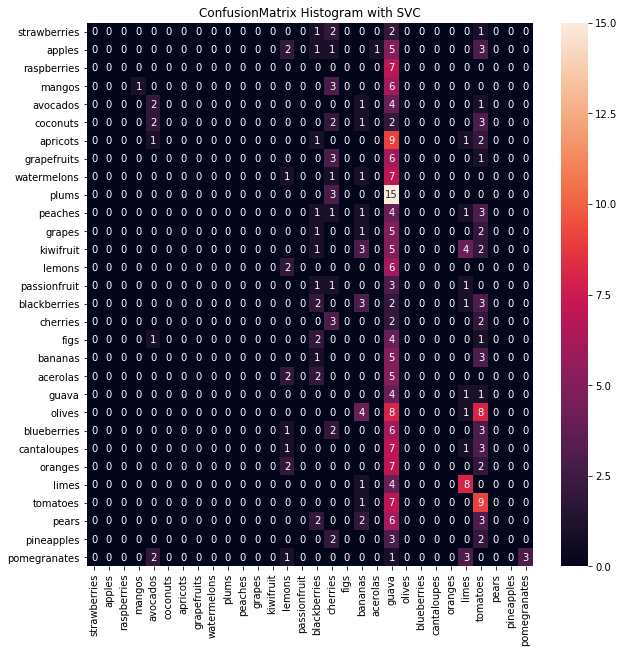

In [10]:
# svc

exp1 = Experiment(fids30_data, svm.SVC(gamma='auto'), "Histogram with SVC")
exp1.train()
exp1.evaluate(figure=True)


### knn

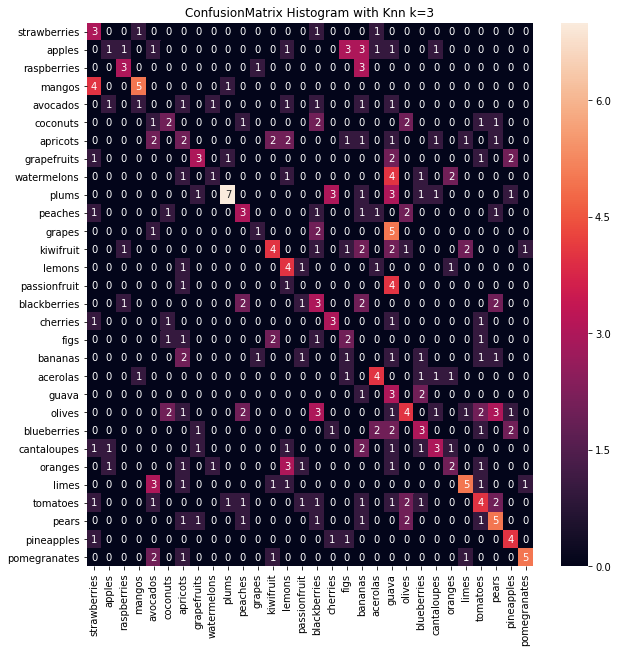

classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.23      0.50      0.32         6
           1       0.25      0.08      0.12        13
           2       0.50      0.43      0.46         7
           3       0.62      0.50      0.56        10
           4       0.00      0.00      0.00         8
           5       0.29      0.20      0.24        10
           6       0.14      0.14      0.14        14
           7       0.43      0.30      0.35        10
           8       0.33      0.10      0.15        10
           9       0.70      0.39      0.50        18
          10       0.30      0.27      0.29        11
          11       0.33      0.11      0.17         9
          12       0.40      0.27      0.32        15
          13       0.27      0.50      0.35

In [11]:
# knn
exp1 = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "Histogram with Knn k=3")
exp1.train()
exp1.evaluate(figure=True, text=True)



#### trying diferent values for k

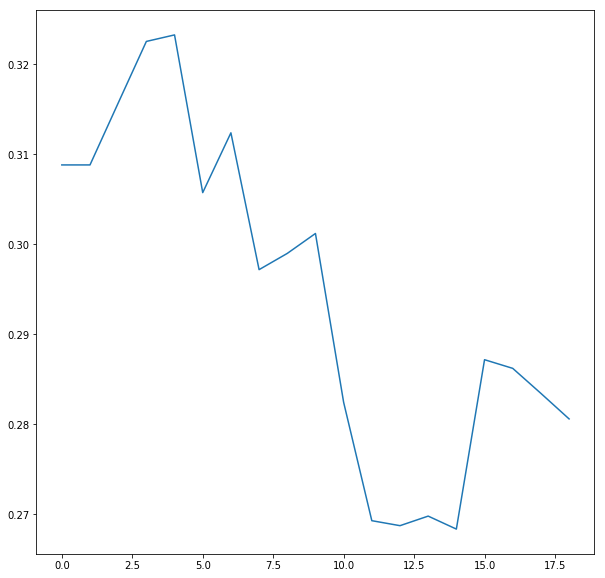

In [12]:
score = []
for k in range(1, 20):
    #print(k)
    classifier = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    classifier.fit(exp1.x_train, exp1.y_train)
    predicted = classifier.predict(exp1.x_test)
    #print(predicted)
    #print(exp1.y_test)
    score.append(metrics.precision_score(exp1.y_test, predicted, average='macro'))
plt.figure(figsize=(10,10))
plt.plot(score)
plt.show()

Different values for k only affect the precission marginaly, so we choose k=3 for better computability.

#### trying different values for Histogram size

8
40
72
104
136
168
200
232
[0.3156845850228203, 0.2190302582407845, 0.18664841150135264, 0.17609039109039107, 0.16072225986019087, 0.1526886700808269, 0.14922345780755392, 0.13180878819036712]


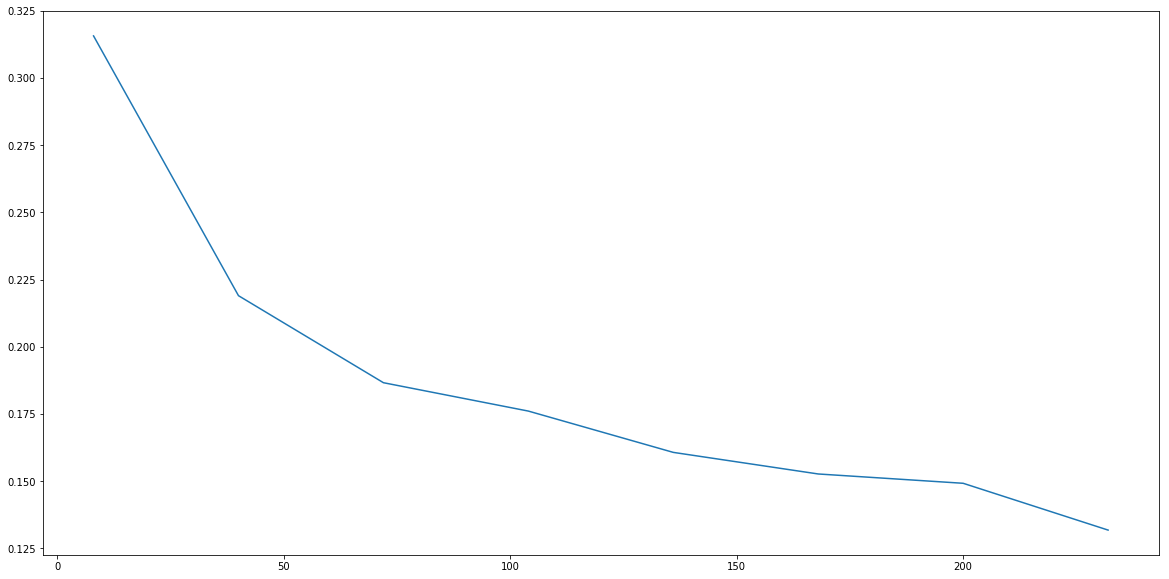

In [16]:
score = []
xrange = range(8, 264, 32)
for h in xrange:
    print(h)
    fids30_data.resetFeatures()
    fids30_data.addFeatures(Histogram(h))
    exp = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "%d Histogram with Knn k=%d" % (h, 10))
    exp.train()
    score.append(exp.precision())
print(score)
plt.figure(figsize=(20,10))
plt.plot(xrange, score)
plt.show()

### Multi Layered Perceptron

Iteration 1, loss = 3.39821934
Iteration 2, loss = 3.33392584
Iteration 3, loss = 3.29117800
Iteration 4, loss = 3.25170759
Iteration 5, loss = 3.21357877
Iteration 6, loss = 3.17743619
Iteration 7, loss = 3.14404197
Iteration 8, loss = 3.10669961
Iteration 9, loss = 3.07007414
Iteration 10, loss = 3.03900957
Iteration 11, loss = 3.00906489
Iteration 12, loss = 2.98144817
Iteration 13, loss = 2.95459649
Iteration 14, loss = 2.92657883
Iteration 15, loss = 2.90440090
Iteration 16, loss = 2.87522750
Iteration 17, loss = 2.85078391
Iteration 18, loss = 2.82307101
Iteration 19, loss = 2.80237694
Iteration 20, loss = 2.78010089
Iteration 21, loss = 2.75602508
Iteration 22, loss = 2.73672633
Iteration 23, loss = 2.71666157
Iteration 24, loss = 2.69338379
Iteration 25, loss = 2.67317117
Iteration 26, loss = 2.65492557
Iteration 27, loss = 2.63572928
Iteration 28, loss = 2.61545848
Iteration 29, loss = 2.60024659
Iteration 30, loss = 2.58286132
Iteration 31, loss = 2.56282455
Iteration 32, los

Iteration 253, loss = 1.36539684
Iteration 254, loss = 1.36324928
Iteration 255, loss = 1.36074719
Iteration 256, loss = 1.35806754
Iteration 257, loss = 1.35571922
Iteration 258, loss = 1.35358536
Iteration 259, loss = 1.35253779
Iteration 260, loss = 1.35104728
Iteration 261, loss = 1.35001417
Iteration 262, loss = 1.34847428
Iteration 263, loss = 1.34682090
Iteration 264, loss = 1.34638421
Iteration 265, loss = 1.34403717
Iteration 266, loss = 1.33991659
Iteration 267, loss = 1.33910524
Iteration 268, loss = 1.33617728
Iteration 269, loss = 1.33297512
Iteration 270, loss = 1.33209507
Iteration 271, loss = 1.32917574
Iteration 272, loss = 1.32769844
Iteration 273, loss = 1.32707292
Iteration 274, loss = 1.32542650
Iteration 275, loss = 1.32252317
Iteration 276, loss = 1.32111912
Iteration 277, loss = 1.31950023
Iteration 278, loss = 1.31803434
Iteration 279, loss = 1.31649085
Iteration 280, loss = 1.31491719
Iteration 281, loss = 1.31314238
Iteration 282, loss = 1.31028673
Iteration 

Iteration 505, loss = 1.02559973
Iteration 506, loss = 1.02431543
Iteration 507, loss = 1.02340155
Iteration 508, loss = 1.02274429
Iteration 509, loss = 1.02081585
Iteration 510, loss = 1.02085603
Iteration 511, loss = 1.02063573
Iteration 512, loss = 1.01922710
Iteration 513, loss = 1.01860896
Iteration 514, loss = 1.01772995
Iteration 515, loss = 1.01639817
Iteration 516, loss = 1.01609706
Iteration 517, loss = 1.01437727
Iteration 518, loss = 1.01304205
Iteration 519, loss = 1.01213847
Iteration 520, loss = 1.01196212
Iteration 521, loss = 1.01100039
Iteration 522, loss = 1.01038135
Iteration 523, loss = 1.00866824
Iteration 524, loss = 1.00900207
Iteration 525, loss = 1.00784302
Iteration 526, loss = 1.00697327
Iteration 527, loss = 1.00632081
Iteration 528, loss = 1.00512694
Iteration 529, loss = 1.00458079
Iteration 530, loss = 1.00410648
Iteration 531, loss = 1.00345051
Iteration 532, loss = 1.00184742
Iteration 533, loss = 1.00086026
Iteration 534, loss = 1.00129007
Iteration 

Iteration 760, loss = 0.84086776
Iteration 761, loss = 0.84058709
Iteration 762, loss = 0.83934921
Iteration 763, loss = 0.83867846
Iteration 764, loss = 0.83964747
Iteration 765, loss = 0.83791853
Iteration 766, loss = 0.83755168
Iteration 767, loss = 0.83630799
Iteration 768, loss = 0.83585030
Iteration 769, loss = 0.83595384
Iteration 770, loss = 0.83569204
Iteration 771, loss = 0.83374007
Iteration 772, loss = 0.83385672
Iteration 773, loss = 0.83373059
Iteration 774, loss = 0.83227999
Iteration 775, loss = 0.83102466
Iteration 776, loss = 0.83038456
Iteration 777, loss = 0.83116396
Iteration 778, loss = 0.82978779
Iteration 779, loss = 0.82967902
Iteration 780, loss = 0.82962594
Iteration 781, loss = 0.82935963
Iteration 782, loss = 0.82926419
Iteration 783, loss = 0.82728753
Iteration 784, loss = 0.82709615
Iteration 785, loss = 0.82668557
Iteration 786, loss = 0.82665245
Iteration 787, loss = 0.82635271
Iteration 788, loss = 0.82536524
Iteration 789, loss = 0.82345786
Iteration 

Iteration 1009, loss = 0.71110583
Iteration 1010, loss = 0.71097746
Iteration 1011, loss = 0.71103750
Iteration 1012, loss = 0.71047247
Iteration 1013, loss = 0.70939078
Iteration 1014, loss = 0.70822786
Iteration 1015, loss = 0.70787679
Iteration 1016, loss = 0.70648930
Iteration 1017, loss = 0.70612982
Iteration 1018, loss = 0.70684186
Iteration 1019, loss = 0.70628428
Iteration 1020, loss = 0.70475786
Iteration 1021, loss = 0.70360214
Iteration 1022, loss = 0.70227295
Iteration 1023, loss = 0.70241606
Iteration 1024, loss = 0.70214015
Iteration 1025, loss = 0.70208317
Iteration 1026, loss = 0.70143487
Iteration 1027, loss = 0.70083063
Iteration 1028, loss = 0.70096996
Iteration 1029, loss = 0.69960391
Iteration 1030, loss = 0.70047664
Iteration 1031, loss = 0.69905297
Iteration 1032, loss = 0.69804843
Iteration 1033, loss = 0.69851382
Iteration 1034, loss = 0.69698013
Iteration 1035, loss = 0.69679079
Iteration 1036, loss = 0.69671756
Iteration 1037, loss = 0.69633588
Iteration 1038

Iteration 1257, loss = 0.60500843
Iteration 1258, loss = 0.60620050
Iteration 1259, loss = 0.60504038
Iteration 1260, loss = 0.60438208
Iteration 1261, loss = 0.60419175
Iteration 1262, loss = 0.60414649
Iteration 1263, loss = 0.60373746
Iteration 1264, loss = 0.60275369
Iteration 1265, loss = 0.60180681
Iteration 1266, loss = 0.60189660
Iteration 1267, loss = 0.60075711
Iteration 1268, loss = 0.60071347
Iteration 1269, loss = 0.60123026
Iteration 1270, loss = 0.60118254
Iteration 1271, loss = 0.60025444
Iteration 1272, loss = 0.59912143
Iteration 1273, loss = 0.59937935
Iteration 1274, loss = 0.59896202
Iteration 1275, loss = 0.59908118
Iteration 1276, loss = 0.59809093
Iteration 1277, loss = 0.59742491
Iteration 1278, loss = 0.59733725
Iteration 1279, loss = 0.59732235
Iteration 1280, loss = 0.59548609
Iteration 1281, loss = 0.59596907
Iteration 1282, loss = 0.59670901
Iteration 1283, loss = 0.59681429
Iteration 1284, loss = 0.59721798
Iteration 1285, loss = 0.59475747
Iteration 1286

Iteration 1499, loss = 0.52525960
Iteration 1500, loss = 0.52405251
Iteration 1501, loss = 0.52442703
Iteration 1502, loss = 0.52387092
Iteration 1503, loss = 0.52378241
Iteration 1504, loss = 0.52321024
Iteration 1505, loss = 0.52352578
Iteration 1506, loss = 0.52369141
Iteration 1507, loss = 0.52419133
Iteration 1508, loss = 0.52442396
Iteration 1509, loss = 0.52219281
Iteration 1510, loss = 0.52225535
Iteration 1511, loss = 0.52187846
Iteration 1512, loss = 0.52125538
Iteration 1513, loss = 0.52067534
Iteration 1514, loss = 0.52137477
Iteration 1515, loss = 0.52091322
Iteration 1516, loss = 0.52078316
Iteration 1517, loss = 0.52041059
Iteration 1518, loss = 0.52080510
Iteration 1519, loss = 0.51822605
Iteration 1520, loss = 0.51845911
Iteration 1521, loss = 0.51757834
Iteration 1522, loss = 0.51828590
Iteration 1523, loss = 0.51844123
Iteration 1524, loss = 0.51738933
Iteration 1525, loss = 0.51837825
Iteration 1526, loss = 0.51803349
Iteration 1527, loss = 0.51841809
Iteration 1528

Iteration 1741, loss = 0.46297332
Iteration 1742, loss = 0.46277002
Iteration 1743, loss = 0.46176709
Iteration 1744, loss = 0.46181647
Iteration 1745, loss = 0.46387229
Iteration 1746, loss = 0.46496674
Iteration 1747, loss = 0.46275307
Iteration 1748, loss = 0.46326740
Iteration 1749, loss = 0.46370093
Iteration 1750, loss = 0.46198882
Iteration 1751, loss = 0.46132428
Iteration 1752, loss = 0.46081662
Iteration 1753, loss = 0.46113441
Iteration 1754, loss = 0.46001250
Iteration 1755, loss = 0.46147206
Iteration 1756, loss = 0.46146155
Iteration 1757, loss = 0.46065056
Iteration 1758, loss = 0.46117361
Iteration 1759, loss = 0.45961071
Iteration 1760, loss = 0.45872273
Iteration 1761, loss = 0.45962796
Iteration 1762, loss = 0.45939561
Iteration 1763, loss = 0.45843558
Iteration 1764, loss = 0.45882360
Iteration 1765, loss = 0.45943612
Iteration 1766, loss = 0.45978783
Iteration 1767, loss = 0.45753324
Iteration 1768, loss = 0.45795498
Iteration 1769, loss = 0.45869139
Iteration 1770

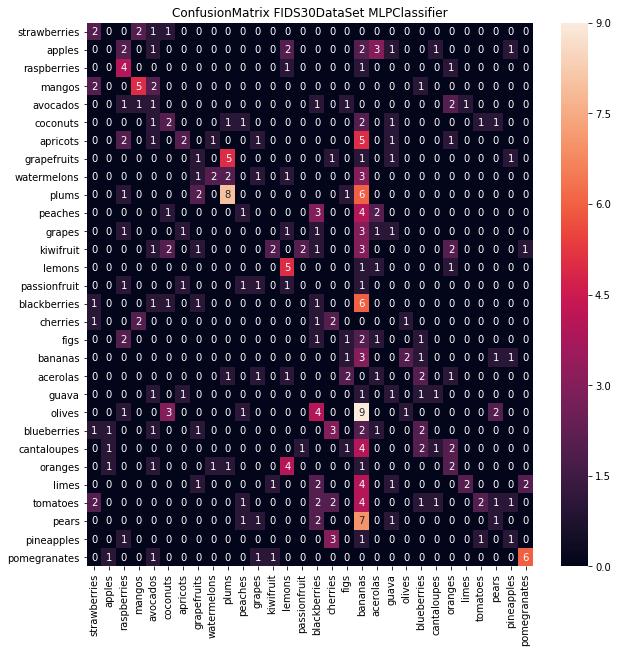

In [19]:

# mlp
exp1 = Experiment(fids30_data,  MLPClassifier(max_iter=3200, verbose=True))
exp1.train()
exp1.evaluate(figure=True)


In [12]:
exp1.evaluate(text=True)

classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.25      0.43      0.32         7
           1       0.33      0.33      0.33        15
           2       0.00      0.00      0.00        13
           3       0.12      0.14      0.13         7
           4       0.33      0.07      0.12        14
           5       0.43      0.46      0.44        13
           6       1.00      0.09      0.17        11
           7       0.33      0.22      0.27         9
    

In [1]:
# prepare dataset with bov features
fids30_data.resetFeatures()
fids30_data.addFeatures(BOV(50))


NameError: name 'fids30_data' is not defined

/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


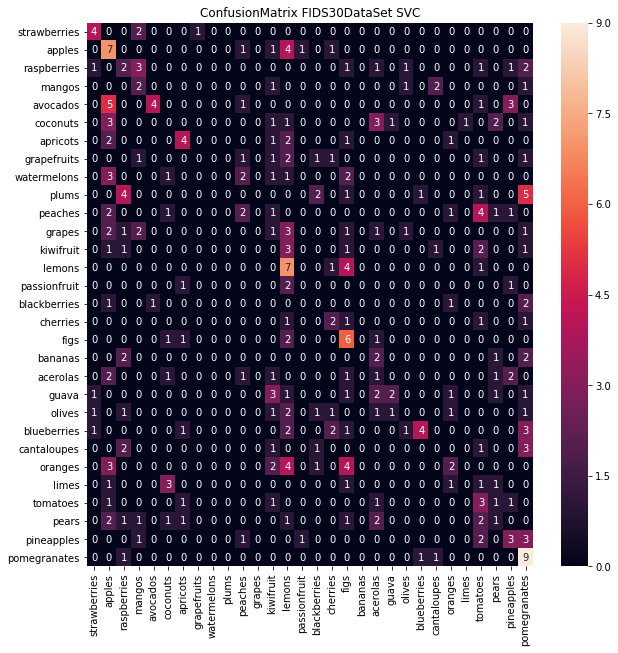

In [15]:

# svc
exp1 = Experiment(fids30_data,  svm.SVC())
exp1.train()
exp1.evaluate(figure=True)


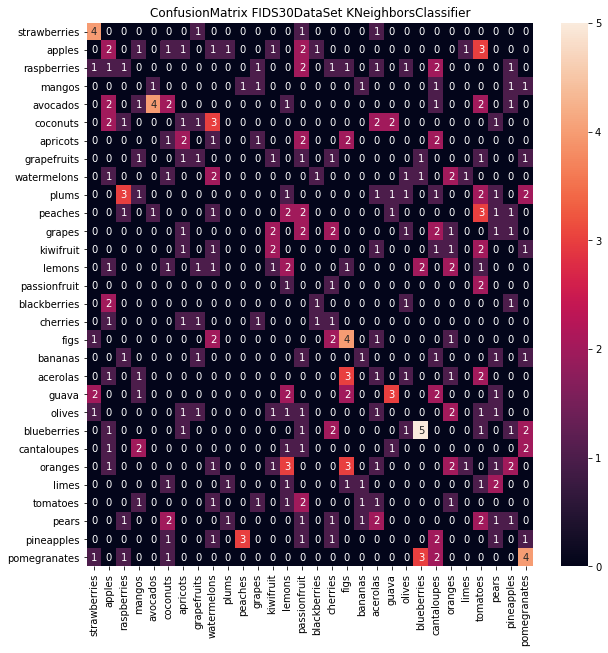

In [16]:

# knn
exp1 = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'))
exp1.train()
exp1.evaluate(figure=True)


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


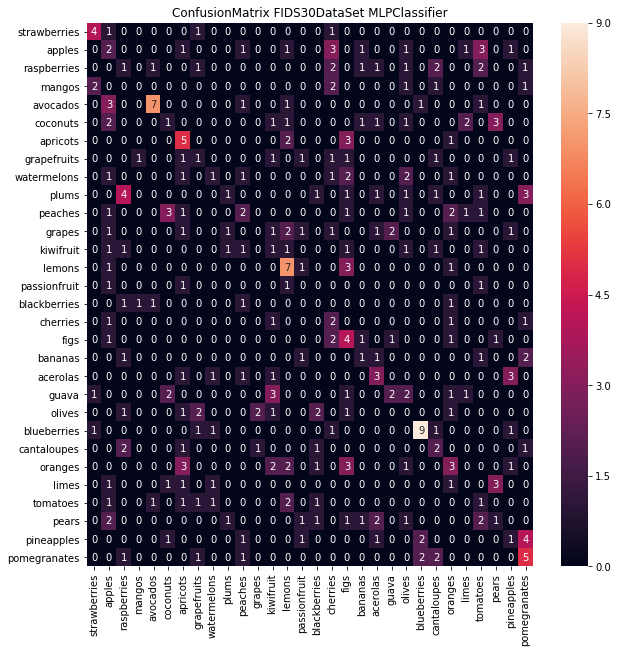

In [17]:

# mlp
exp1 = Experiment(fids30_data,  MLPClassifier())
exp1.train()
exp1.evaluate(figure=True)


In [ ]:
# prepare the car dataset with histogram features
#datapath = "/home/lazafi/labor/ml-2019/male2019/3/data/CarData"
car_data = CarDataSet()
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages")
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages", "neg")
print(car_data.count)


In [ ]:
car_data.addFeatures(Histogram(10))

# knn
exp1 = Experiment(car_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "Histogram with Knn k=3")
exp1.train()
exp1.evaluate(figure=True)


In [ ]:
exp1.evaluate(text=True)